# Encoding worker data ready for establishment classification

#### I need to write stuff here

In [55]:
import pandas as pd
import numpy as np

from sklearn import preprocessing
from kmodes.kprototypes import KPrototypes

In [56]:
df = pd.read_csv("../Data/worker_analysis/worker_SC.csv")

df.head()

,est_id,worker_id,est_type,cssr,service_provide_id,emp_status,age,gender,disabled,ethnicity,...,main_job,job_group,hrs_worked,calc_hr_rate,asc_qul_held,levelscqheld,trainflag,training,apprentice,days_cur_role
0,7408,168691,Private sector,Birmingham,Domiciliary Care services - CQC Regulated,Permanent,65.0,Female,No,White British,...,Registered Manager,Manager/Supervisor,39.0,13.31,Yes,Level 4,Yes,Dementia care,No,5638.0
1,7408,168712,Private sector,Birmingham,Domiciliary Care services - CQC Regulated,Permanent,44.0,Female,No,Pakistani,...,Administrative or office staff not care-providing,Other,37.0,9.12,Yes,Level 2,Yes,Dementia care,No,5315.0
2,7408,168694,Private sector,Birmingham,Domiciliary Care services - CQC Regulated,Permanent,65.0,Female,No,White British,...,Middle Management,Manager/Supervisor,39.0,9.86,Yes,Level 3,Yes,Dementia care,No,5233.0
3,6893,153985,Private sector,Devon,Care home services with nursing - CQC Regulated,Permanent,54.0,Female,No,White British,...,Senior Care Worker,Direct Care,36.0,10.50,Yes,Level 3,Yes,Fire Safety,No,3635.0
4,6893,154009,Private sector,Devon,Care home services with nursing - CQC Regulated,Permanent,39.0,Male,No,White British,...,Care Worker,Direct Care,24.0,9.50,No,No qual,Yes,First Aid,No,3532.0


In [57]:
df.iloc[0]

est_id                                                     7408
worker_id                                                168691
est_type                                         Private sector
cssr                                                 Birmingham
service_provide_id    Domiciliary Care services - CQC Regulated
emp_status                                            Permanent
age                                                        65.0
gender                                                   Female
disabled                                                     No
ethnicity                                         White British
nationality                                             British
dist_mi                                                 1.28506
recruitment                             Not previously employed
yrs_in_asc                                                   30
start_age                                                  36.0
days_sick                               

### We will begin by copying the imported data set and dropping the salary_int, asc_qul_held and trainflag columns. The information held in salary_int, asc_qul_held and trainflag is all captured in other columns.  

In [58]:
c_df = df.copy()
c_df = c_df.drop(columns=["salary_int", "asc_qul_held", "trainflag"])

In [59]:
continuous_values = [
    "age", 
    "dist_mi",
    "yrs_in_asc",
    "days_cur_role",
    "start_age",
    "days_sick",
    "hrs_worked",
    "calc_hr_rate",
]

In [60]:
catagorical_valuse = [
    "est_type",
    "cssr",
    "service_provide_id",
    "emp_status",
    "gender",
    "disabled",
    "ethnicity",
    "nationality",
    "recruitment",
    "zero_hr_cont",
    "people_cared_for",
    "main_job",
    "job_group",
    "apprentice",
    "levelscqheld",	
    "training",
]

In [61]:
c_df.iloc[0]

est_id                                                     7408
worker_id                                                168691
est_type                                         Private sector
cssr                                                 Birmingham
service_provide_id    Domiciliary Care services - CQC Regulated
emp_status                                            Permanent
age                                                        65.0
gender                                                   Female
disabled                                                     No
ethnicity                                         White British
nationality                                             British
dist_mi                                                 1.28506
recruitment                             Not previously employed
yrs_in_asc                                                   30
start_age                                                  36.0
days_sick                               

In [62]:
len(c_df["est_id"].unique())

5463

In [63]:
## Create a new dataframe with the onehot encoded values of 
one_hot = c_df.drop(catagorical_valuse, axis=1).join(pd.get_dummies(c_df[catagorical_valuse]))

one_hot.head()

,est_id,worker_id,age,dist_mi,yrs_in_asc,start_age,days_sick,hrs_worked,calc_hr_rate,days_cur_role,...,training_Mental Health,training_Mental capacity and deprivation of liberty,training_Moving and handling,training_No training,training_Nutrition and hydration,training_Palliative or end of life care,training_Physical Disability,training_Positive Behaviour and support,training_Safeguarding Adults,training_Supervision / Performance management
0,7408,168691,65.0,1.285060,30,36.0,0.0,39.0,13.31,5638.0,...,0,0,0,0,0,0,0,0,0,0
1,7408,168712,44.0,3.903090,15,30.0,0.0,37.0,9.12,5315.0,...,0,0,0,0,0,0,0,0,0,0
2,7408,168694,65.0,1.807238,29,37.0,7.0,39.0,9.86,5233.0,...,0,0,0,0,0,0,0,0,0,0
3,6893,153985,54.0,0.652571,13,42.0,2.0,36.0,10.50,3635.0,...,0,0,0,0,0,0,0,0,0,0
4,6893,154009,39.0,1.747556,15,25.0,7.0,24.0,9.50,3532.0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
## first - lets normalise the continuous features within the data set.
scaler = preprocessing.MinMaxScaler()

c_df[continuous_values] = scaler.fit_transform(c_df[continuous_values])

In [50]:
c_df[continuous_values].head()

,age,dist_mi,yrs_in_asc,days_cur_role,start_age,days_sick,hrs_worked,calc_hr_rate
0,0.671233,0.002926,0.475410,0.278767,0.328125,0.000000,0.513514,0.032942
1,0.383562,0.008887,0.229508,0.262788,0.234375,0.000000,0.486486,0.017623
2,0.671233,0.004115,0.459016,0.258732,0.343750,0.019126,0.513514,0.020328
3,0.520548,0.001486,0.196721,0.179677,0.421875,0.005464,0.472973,0.022668
4,0.315068,0.003979,0.229508,0.174582,0.156250,0.019126,0.310811,0.019012


In [51]:
## Use the K-Prototypes algorithm  to cluster data
kproto = KPrototypes(n_clusters=10, init='Cao')

In [85]:
# clusters = kproto.fit_predict(c_df, categorical=[1, 2, 3, 4, 6, 7, 8, 9, 11, 15, 16, 17, 18, 21, 22, 23])

In [34]:
ordinal_values = [
    "levelscqheld"
]

In [42]:
continuous_norm.iloc[0]

est_id                                                     7408
est_type                                         Private sector
cssr                                                 Birmingham
service_provide_id    Domiciliary Care services - CQC Regulated
emp_status                                            Permanent
age                                                        65.0
gender                                                   Female
disabled                                                     No
ethnicity                                         White British
nationality                                             British
dist_mi                                                 1.28506
recruitment                             Not previously employed
yrs_in_asc                                                   30
start_age                                                  36.0
days_sick                                                   0.0
zero_hr_cont                            

In [10]:
df["age"].describe()

count    42329.000000
mean        46.414042
std         13.226200
min         16.000000
25%         36.000000
50%         48.000000
75%         57.000000
max         89.000000
Name: age, dtype: float64

In [68]:
age_bins = [15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90]
age_labels = [
    "15-20yo", "21-25yo", "26-30yo", "31-35yo", "36-40yo", "41-45yo", 
    "46-50yo", "51-55yo", "56-60yo", "61-65yo", "66-70yo", "71-75yo", 
    "76-80yo", "81-85yo", "86-90yo",
    ]

In [69]:
df_age = df[["est_id", "age"]].copy()
df_age["binned"] = pd.cut(df_age["age"], age_bins, labels=age_labels)

In [70]:
df_age = df_age.join(pd.get_dummies(df_age["binned"])).drop(columns=["age", "binned"])

In [72]:
df_age.head()

,est_id,15-20yo,21-25yo,26-30yo,31-35yo,36-40yo,41-45yo,46-50yo,51-55yo,56-60yo,61-65yo,66-70yo,71-75yo,76-80yo,81-85yo,86-90yo
0,7408,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,7408,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,7408,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,6893,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,6893,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


<BarContainer object of 1 artists>

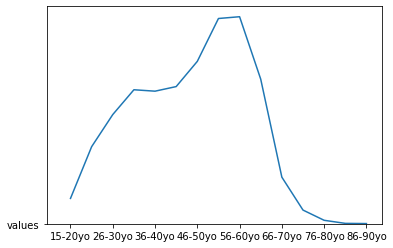

In [73]:
df_age[age_labels].mean().plot().bar(
    height="values",
    x="index"
)

In [74]:
df["hrs_worked"].describe()

count    42329.000000
mean        30.747508
std          9.338958
min          1.000000
25%         24.000000
50%         33.500000
75%         37.000000
max         75.000000
Name: hrs_worked, dtype: float64

In [75]:
hrs_bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80]
hrs_labels = [
    "0-5hr", "6-10hr", "11-15hr", "16-20hr", "21-25hr", "26-30hr", "31-35hr", 
    "36-40hr", "41-45hr", "46-50hr", "51-55hr", "56-60hr", "61-65hr", "66-70hr", 
    "71-75hr", "76-80hr"
    ]

In [76]:
df_hrs = df[["est_id", "hrs_worked"]].copy()
df_hrs["binned"] = pd.cut(df_hrs["hrs_worked"], hrs_bins, labels=hrs_labels)

In [77]:
df_hrs = df_hrs.join(pd.get_dummies(df_hrs["binned"])).drop(columns=["hrs_worked", "binned"])

In [78]:
df_hrs.head()

,est_id,0-5hr,6-10hr,11-15hr,16-20hr,21-25hr,26-30hr,31-35hr,36-40hr,41-45hr,46-50hr,51-55hr,56-60hr,61-65hr,66-70hr,71-75hr,76-80hr
0,7408,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,7408,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,7408,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,6893,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,6893,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [79]:
df.loc[df["est_id"] == 7408]

,est_id,worker_id,est_type,cssr,service_provide_id,emp_status,age,gender,disabled,ethnicity,...,main_job,job_group,hrs_worked,calc_hr_rate,asc_qul_held,levelscqheld,trainflag,training,apprentice,days_cur_role
0,7408,168691,Private sector,Birmingham,Domiciliary Care services - CQC Regulated,Permanent,65.0,Female,No,White British,...,Registered Manager,Manager/Supervisor,39.0,13.31,Yes,Level 4,Yes,Dementia care,No,5638.0
1,7408,168712,Private sector,Birmingham,Domiciliary Care services - CQC Regulated,Permanent,44.0,Female,No,Pakistani,...,Administrative or office staff not care-providing,Other,37.0,9.12,Yes,Level 2,Yes,Dementia care,No,5315.0
2,7408,168694,Private sector,Birmingham,Domiciliary Care services - CQC Regulated,Permanent,65.0,Female,No,White British,...,Middle Management,Manager/Supervisor,39.0,9.86,Yes,Level 3,Yes,Dementia care,No,5233.0


<BarContainer object of 1 artists>

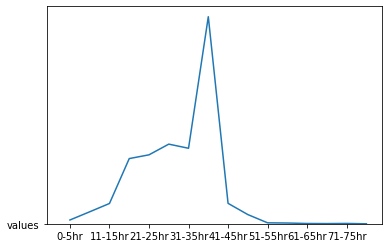

In [54]:
df_hrs[hrs_labels].mean().plot().bar(
    height="values",
    x="index"
)

In [46]:
continuous_values = [
    "age", 
    "dist_mi",
    "yrs_in_asc",
    "days_cur_role",
    "start_age",
    "days_sick",
    "hrs_worked",
    "calc_hr_rate",
]

In [107]:
df_dist = df[["est_id", "dist_mi"]].copy()

In [82]:
df_dist["dist_mi"].describe()

count    42329.000000
mean         5.178341
std         12.095721
min          0.000000
25%          1.077917
50%          2.592435
75%          5.819896
max        439.210859
Name: dist_mi, dtype: float64

In [108]:
dist_bins = np.linspace(0, 150, 31)
dist_labels = []
for i in range(len(dist_bins)-1):
    lab = f"{int(dist_bins[i])}-{int(dist_bins[i]+5)}mi"
    dist_labels.append(lab)

In [109]:
df_dist["binned"] = pd.cut(df_dist["dist_mi"], dist_bins, labels=dist_labels)

In [110]:
df_dist = df_dist.join(pd.get_dummies(df_dist["binned"])).drop(columns=["dist_mi", "binned"])


In [111]:
df_dist.head()

,est_id,0-5mi,5-10mi,10-15mi,15-20mi,20-25mi,25-30mi,30-35mi,35-40mi,40-45mi,...,100-105mi,105-110mi,110-115mi,115-120mi,120-125mi,125-130mi,130-135mi,135-140mi,140-145mi,145-150mi
0,7408,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7408,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7408,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,6893,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6893,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<BarContainer object of 1 artists>

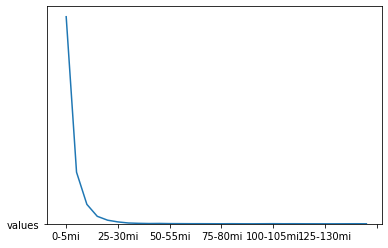

In [112]:
df_dist[dist_labels].mean().plot().bar(
    height="values",
    x="index"
)